# Modelling
#### Hypothesis: "There is a positive association between shorter sleep duration and the risk of experiencing a stroke."
In this section, I tested the different classification models, such as SVM, logistic Regression, Random Forest, Decision Tree and KNN with the other target variables namely ,'heart disease', 'diabetic', 'skin cancer'. We do this with the Unbalanced dataset to see our results, after which we will test it out with an Undersampled dataset and a dataset that has gone through both undersampling and oversampling techniques. This will then be compared with the models that was trained without the target variables to see if having the target variables affects our models performance so as to prove that this is a independent hypothesis not linked in any way to the others. After that, we can decide which dataset has the best performance and from there do our feature selection and choose the best model that we have. After which, we remove 'SleepTime' to see if it affects our best models performance and check the correlation of it and or target variable to check if our hypothesis is correct or not.

The aim of the models is to be able to predict patients with stroke better and at the same time not mistake patients that do not have stroke as patients that do. Thus we prioritize increasing the percentage of True poisitives and decreasing the percentage of False negatives and hopefully be able to reach an equilibrium to find the best model and the best dataset that does both of these

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, 
classification_report,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.ensemble import ExtraTreesClassifier
import lime
from lime import lime_tabular

# Unbalanced dataset with target variables and no feature selection


In [2]:
df = pd.read_csv('stroke_cleaned.csv')

In [3]:
df.head()

,Stroke_code,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_code,Smoking_code,AlcoholDrinking_code,DiffWalking_code,Sex_code,AgeCategory_code,Race_code,Diabetic_code,PhysicalActivity_code,GenHealth_code,Asthma_code,KidneyDisease_code,SkinCancer_code
0,0.0,16.60,3.0,30.0,5.0,0.0,1.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0
1,1.0,20.34,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0
2,0.0,26.58,20.0,30.0,8.0,0.0,1.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0
4,0.0,23.71,28.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0


In [4]:
df.shape

(289399, 18)

In [5]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Checking  the feature Importance

In [7]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x_train, y_train)
columns = list(df.loc[:,df.columns != "Stroke_code"].columns)
importance = model.feature_importances_
print(np.concatenate((np.reshape(columns,(len(columns),1)), model.feature_importances_.reshape(len(importance),1)),1))

[['BMI' '0.3173829584597025']
 ['PhysicalHealth' '0.08637011182639619']
 ['MentalHealth' '0.08435211501505994']
 ['SleepTime' '0.1158063492492076']
 ['HeartDisease_code' '0.029793359405848634']
 ['Smoking_code' '0.01908952994114257']
 ['AlcoholDrinking_code' '0.008866284013321922']
 ['DiffWalking_code' '0.018608252177391742']
 ['Sex_code' '0.02424148611755193']
 ['AgeCategory_code' '0.10742334263408458']
 ['Race_code' '0.04688597390782054']
 ['Diabetic_code' '0.02661624367835266']
 ['PhysicalActivity_code' '0.01586524645328264']
 ['GenHealth_code' '0.058239537696819006']
 ['Asthma_code' '0.018038662139154355']
 ['KidneyDisease_code' '0.010344412061425095']
 ['SkinCancer_code' '0.012076135223438115']]


### Training the models

In [3]:
LR = LogisticRegression(max_iter=1000)
SVM = SVC()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators = 140)

In [9]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [10]:
SVM.fit(x_train,y_train)

SVC()

In [11]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=140)

In [14]:
LR_pred=LR.predict(x_test)
SVM_pred=SVM.predict(x_test)
KNN_pred=KNN.predict(x_test)
DT_pred=DT.predict(x_test)
RF_pred=RF.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     55561
         1.0       0.39      0.00      0.01      2319

    accuracy                           0.96     57880
   macro avg       0.68      0.50      0.49     57880
weighted avg       0.94      0.96      0.94     57880



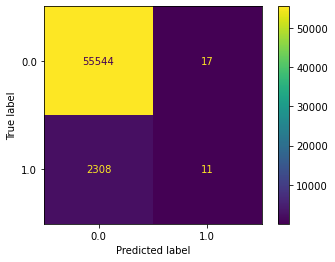

None


In [15]:
print("Logistic Regression:")
print(classification_report(y_test,LR_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=LR_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=LR.classes_)
vis.plot()
print(plt.show())

SVM:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     55561
         1.0       0.00      0.00      0.00      2319

    accuracy                           0.96     57880
   macro avg       0.48      0.50      0.49     57880
weighted avg       0.92      0.96      0.94     57880



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


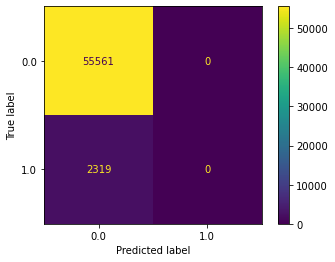

None


In [16]:
print("SVM:")
print(classification_report(y_test,SVM_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=SVM_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVM.classes_)
vis.plot()
print(plt.show())

KNN:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     55561
         1.0       0.18      0.01      0.02      2319

    accuracy                           0.96     57880
   macro avg       0.57      0.50      0.50     57880
weighted avg       0.93      0.96      0.94     57880



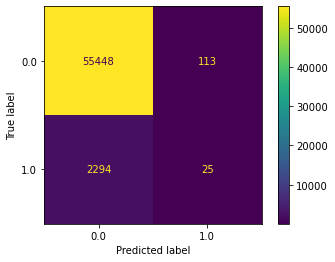

None


In [17]:
print("KNN:")
print(classification_report(y_test,KNN_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=KNN_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=KNN.classes_)
vis.plot()
print(plt.show())

Decision Tree:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96     55561
         1.0       0.12      0.15      0.13      2319

    accuracy                           0.92     57880
   macro avg       0.54      0.55      0.55     57880
weighted avg       0.93      0.92      0.93     57880



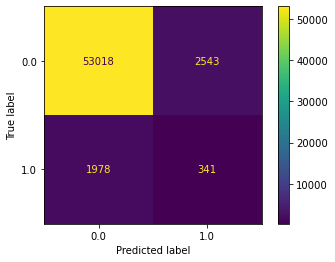

None


In [18]:
print("Decision Tree:")
print(classification_report(y_test,DT_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=DT_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=DT.classes_)
vis.plot()
print(plt.show())

Random Forest:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     55561
         1.0       0.08      0.01      0.01      2319

    accuracy                           0.96     57880
   macro avg       0.52      0.50      0.50     57880
weighted avg       0.92      0.96      0.94     57880



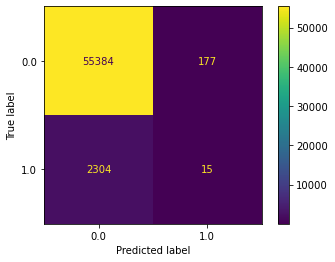

None


In [19]:
print("Random Forest:")
print(classification_report(y_test,RF_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=RF_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF.classes_)
vis.plot()
print(plt.show())

## Analysis of Unbalanced dataset with traget variables
Due to the data being so unbalanced, all models could only predict class label 0, which are patients that did not get stroke, well. Accuracies were high all above an accracy of 90% however when looking at the pecision, recall and f1-score for class label 1, we can see that it is very bad most below 0.1. Looking at the confusion matrix we can see why as all the models classified  all the labels as 0 with a false positive pecentage of higher than 90%. Next we will look at the dataset that was Undersampled to see if there are improvements or not.

# Undersample with target variables and no feature selection
### Random Undersampling is the method used

In [20]:
under_sampler = RandomUnderSampler(random_state=42)
x_train_u, y_train_u = under_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_train_u)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0.0: 8947, 1.0: 8947})
Testing target statistics: Counter({0.0: 55561, 1.0: 2319})


In [21]:
LR.fit(x_train_u,y_train_u)

LogisticRegression(max_iter=1000)

In [22]:
SVM.fit(x_train_u,y_train_u)

SVC()

In [23]:
KNN.fit(x_train_u,y_train_u)

KNeighborsClassifier()

In [24]:
DT.fit(x_train_u,y_train_u)

DecisionTreeClassifier()

In [25]:
RF.fit(x_train_u,y_train_u)

RandomForestClassifier(n_estimators=140)

In [26]:
LR_pred_u=LR.predict(x_test)
SVM_pred_u=SVM.predict(x_test)
KNN_pred_u=KNN.predict(x_test)
DT_pred_u=DT.predict(x_test)
RF_pred_u=RF.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85     55561
         1.0       0.11      0.72      0.18      2319

    accuracy                           0.74     57880
   macro avg       0.55      0.73      0.52     57880
weighted avg       0.95      0.74      0.82     57880



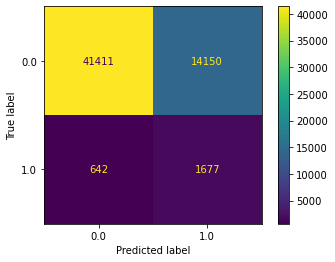

None


In [27]:
print("Logistic Regression:")
print(classification_report(y_test,LR_pred_u))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=LR_pred_u)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=LR.classes_)
vis.plot()
print(plt.show())

SVM:
              precision    recall  f1-score   support

         0.0       0.99      0.69      0.81     55561
         1.0       0.09      0.77      0.17      2319

    accuracy                           0.69     57880
   macro avg       0.54      0.73      0.49     57880
weighted avg       0.95      0.69      0.78     57880



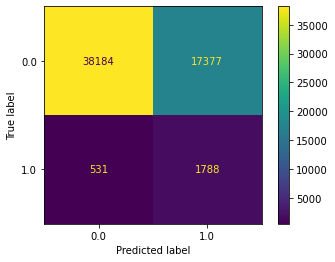

None


In [28]:
print("SVM:")
print(classification_report(y_test,SVM_pred_u))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=SVM_pred_u)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVM.classes_)
vis.plot()
print(plt.show())

KNN:
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.81     55561
         1.0       0.08      0.67      0.15      2319

    accuracy                           0.68     57880
   macro avg       0.53      0.68      0.48     57880
weighted avg       0.94      0.68      0.78     57880



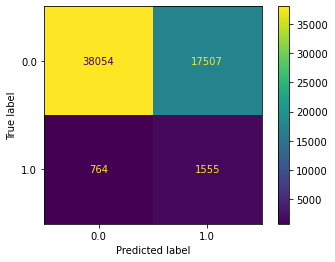

None


In [29]:
print("KNN:")
print(classification_report(y_test,KNN_pred_u))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=KNN_pred_u)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=KNN.classes_)
vis.plot()
print(plt.show())

Decision Tree:
              precision    recall  f1-score   support

         0.0       0.98      0.64      0.77     55561
         1.0       0.07      0.65      0.13      2319

    accuracy                           0.64     57880
   macro avg       0.52      0.64      0.45     57880
weighted avg       0.94      0.64      0.75     57880



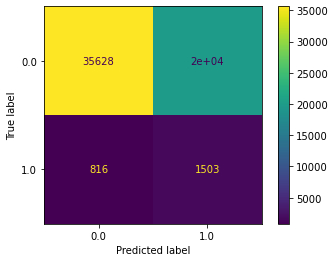

None


In [30]:
print("Decision Tree:")
print(classification_report(y_test,DT_pred_u))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=DT_pred_u)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=DT.classes_)
vis.plot()
print(plt.show())

Random Forest:
              precision    recall  f1-score   support

         0.0       0.99      0.69      0.81     55561
         1.0       0.10      0.77      0.17      2319

    accuracy                           0.70     57880
   macro avg       0.54      0.73      0.49     57880
weighted avg       0.95      0.70      0.79     57880



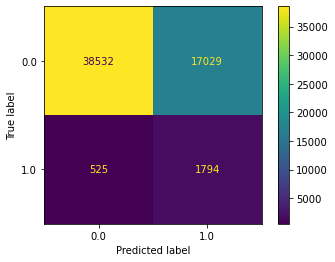

None


In [31]:
print("Random Forest:")
print(classification_report(y_test,RF_pred_u))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=RF_pred_u)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF.classes_)
vis.plot()
print(plt.show())

## Analysis
Undersampling decreased the accuracy of the models as compared to the unbalanced dataset however the unbalanced dataset only did well in predicting the 0 values. For the undersampled dataset, the predictions of True positives has increased exponentially however the trade off is that the predictions of True negatives has dropped as well with our highest True positive rate being 77.4% while our highest True negative rate being 74.5% our highest accuracy being 74% Logistic regression being our best model with a 74% accuracy, 74.5% True negative rate and a 72.3% True positiive rate. The problem that I found out was that the number of class 0 labels was significantly decreased, causing a loss in alot of information which affected the accuracy. Next we will check if the dataset using Undersampling of a 40-60 split does better.

# Undersample 40-60 with target variables and no Feature Selection
### Undersampling technique used is Random Undersampling
I undersampled the majority class to have 70% more than the minority class. This creates a 40%-60% split in classes, 40% class label 1 and 60% class label 0.

In [32]:
# over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [ ('u', under)]
pipeline = Pipeline(steps=steps)
x_train_ou, y_train_ou = pipeline.fit_resample(x_train, y_train)
print(f"Training target statistics(original): {Counter(y_train)}")
print(f"Training target statistics: {Counter(y_train_ou)}")

Training target statistics(original): Counter({0.0: 222572, 1.0: 8947})
Training target statistics: Counter({0.0: 12781, 1.0: 8947})


In [33]:
LR.fit(x_train_ou,y_train_ou)

LogisticRegression(max_iter=1000)

In [34]:
SVM.fit(x_train_ou,y_train_ou)

SVC()

In [35]:
KNN.fit(x_train_ou,y_train_ou)

KNeighborsClassifier()

In [36]:
DT.fit(x_train_ou,y_train_ou)

DecisionTreeClassifier()

In [37]:
RF.fit(x_train_ou,y_train_ou)

RandomForestClassifier(n_estimators=140)

In [38]:
LR_pred_ou=LR.predict(x_test)
SVM_pred_ou=SVM.predict(x_test)
KNN_pred_ou=KNN.predict(x_test)
DT_pred_ou=DT.predict(x_test)
RF_pred_ou=RF.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90     55561
         1.0       0.13      0.61      0.21      2319

    accuracy                           0.82     57880
   macro avg       0.56      0.72      0.56     57880
weighted avg       0.95      0.82      0.87     57880



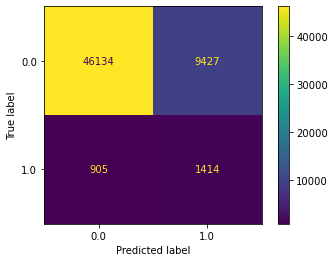

None


In [39]:
print("Logistic Regression:")
print(classification_report(y_test,LR_pred_ou))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=LR_pred_ou)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=LR.classes_)
vis.plot()
print(plt.show())

SVM:
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90     55561
         1.0       0.13      0.60      0.21      2319

    accuracy                           0.82     57880
   macro avg       0.55      0.71      0.56     57880
weighted avg       0.95      0.82      0.87     57880



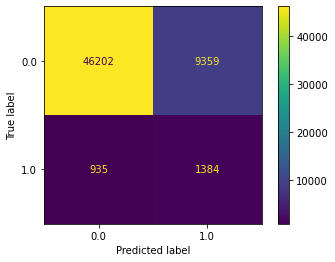

None


In [40]:
print("SVM:")
print(classification_report(y_test,SVM_pred_ou))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=SVM_pred_ou)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVM.classes_)
vis.plot()
print(plt.show())

KNN:
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86     55561
         1.0       0.09      0.56      0.16      2319

    accuracy                           0.76     57880
   macro avg       0.53      0.66      0.51     57880
weighted avg       0.94      0.76      0.83     57880



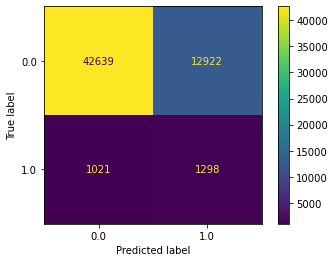

None


In [41]:
print("KNN:")
print(classification_report(y_test,KNN_pred_ou))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=KNN_pred_ou)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=KNN.classes_)
vis.plot()
print(plt.show())

Decision Tree:
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.81     55561
         1.0       0.07      0.58      0.13      2319

    accuracy                           0.69     57880
   macro avg       0.53      0.64      0.47     57880
weighted avg       0.94      0.69      0.79     57880



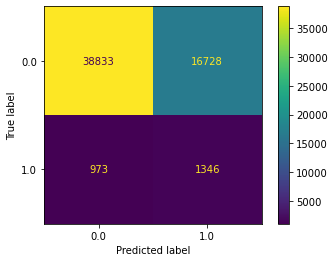

None


In [42]:
print("Decision Tree:")
print(classification_report(y_test,DT_pred_ou))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=DT_pred_ou)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=DT.classes_)
vis.plot()
print(plt.show())

Random Forest:
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86     55561
         1.0       0.11      0.68      0.19      2319

    accuracy                           0.76     57880
   macro avg       0.55      0.72      0.52     57880
weighted avg       0.95      0.76      0.83     57880



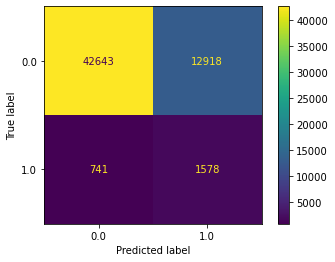

None


In [43]:
print("Random Forest:")
print(classification_report(y_test,RF_pred_ou))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=RF_pred_ou)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF.classes_)
vis.plot()
print(plt.show())

## Analysis
Accuracy has increased as compared to the models trained with undersampling of 50-50 split. After all these tries, our best models are either SVM, Logistic regression, or Random Forest, however it is still pending and we will try other variations to see if our best models still turn our to be these. Based on what I think to be important for the model, Random Forest is the best perrforming model with an accuracy of 76%, True positive rate of 66% and True negative rate of 76.7% which is relatively promising. Further down, we will try to increase the True positive rate and maintain our True negative rate. Next we will check if removing our target vairables will have any impact on our predictions.

# Unbalanced Dataset (without target variables)

In [44]:
df.columns

Index(['Stroke_code', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'HeartDisease_code', 'Smoking_code', 'AlcoholDrinking_code',
       'DiffWalking_code', 'Sex_code', 'AgeCategory_code', 'Race_code',
       'Diabetic_code', 'PhysicalActivity_code', 'GenHealth_code',
       'Asthma_code', 'KidneyDisease_code', 'SkinCancer_code'],
      dtype='object')

In [4]:
df = df.drop(columns = ['Diabetic_code','SkinCancer_code','HeartDisease_code'])

In [46]:
df.columns

Index(['Stroke_code', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'Smoking_code', 'AlcoholDrinking_code', 'DiffWalking_code', 'Sex_code',
       'AgeCategory_code', 'Race_code', 'PhysicalActivity_code',
       'GenHealth_code', 'Asthma_code', 'KidneyDisease_code'],
      dtype='object')

In [5]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x_train, y_train)
columns = list(df.loc[:,df.columns != "Stroke_code"].columns)
importance = model.feature_importances_
print(np.concatenate((np.reshape(columns,(len(columns),1)), model.feature_importances_.reshape(len(importance),1)),1))

[['BMI' '0.40138397128212855']
 ['PhysicalHealth' '0.09116815605702104']
 ['MentalHealth' '0.09182366778188433']
 ['SleepTime' '0.10805030105591017']
 ['Smoking_code' '0.012608863914811917']
 ['AlcoholDrinking_code' '0.007440507845999912']
 ['DiffWalking_code' '0.021885684698738177']
 ['Sex_code' '0.02007634566833195']
 ['AgeCategory_code' '0.10542510968295611']
 ['Race_code' '0.04853076608713672']
 ['PhysicalActivity_code' '0.014653904594904949']
 ['GenHealth_code' '0.05288694556006257']
 ['Asthma_code' '0.01577746596507218']
 ['KidneyDisease_code' '0.0082883098050416']]


In [50]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [56]:
SVM.fit(x_train,y_train)

SVC()

In [57]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [58]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=140)

In [60]:
LR_pred_r=LR.predict(x_test)
SVM_pred_r=SVM.predict(x_test)
KNN_pred_r=KNN.predict(x_test)
DT_pred_r=DT.predict(x_test)
RF_pred_r=RF.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     55561
         1.0       0.40      0.00      0.00      2319

    accuracy                           0.96     57880
   macro avg       0.68      0.50      0.49     57880
weighted avg       0.94      0.96      0.94     57880



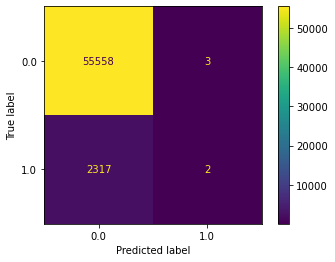

None


In [61]:
print("Logistic Regression:")
print(classification_report(y_test,LR_pred_r))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=LR_pred_r)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=LR.classes_)
vis.plot()
print(plt.show())

SVM:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     55561
         1.0       0.00      0.00      0.00      2319

    accuracy                           0.96     57880
   macro avg       0.48      0.50      0.49     57880
weighted avg       0.92      0.96      0.94     57880



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


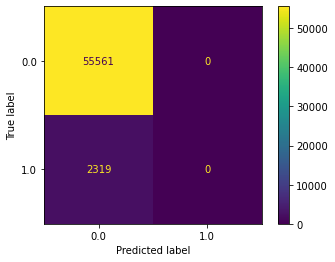

None


In [62]:
print("SVM:")
print(classification_report(y_test,SVM_pred_r))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=SVM_pred_r)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVM.classes_)
vis.plot()
print(plt.show())

KNN:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     55561
         1.0       0.13      0.01      0.02      2319

    accuracy                           0.96     57880
   macro avg       0.54      0.50      0.50     57880
weighted avg       0.93      0.96      0.94     57880



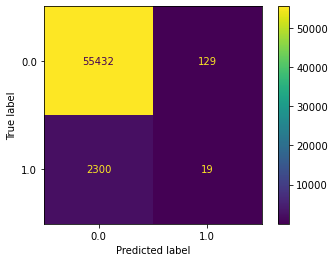

None


In [63]:
print("KNN:")
print(classification_report(y_test,KNN_pred_r))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=KNN_pred_r)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=KNN.classes_)
vis.plot()
print(plt.show())

Decision Tree:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     55561
         1.0       0.10      0.11      0.11      2319

    accuracy                           0.92     57880
   macro avg       0.53      0.54      0.53     57880
weighted avg       0.93      0.92      0.93     57880



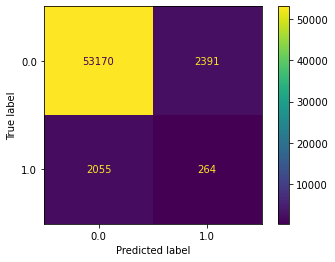

None


In [64]:
print("Decision Tree:")
print(classification_report(y_test,DT_pred_r))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=DT_pred_r)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=DT.classes_)
vis.plot()
print(plt.show())

Random Forest:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     55561
         1.0       0.06      0.01      0.01      2319

    accuracy                           0.96     57880
   macro avg       0.51      0.50      0.49     57880
weighted avg       0.92      0.96      0.94     57880



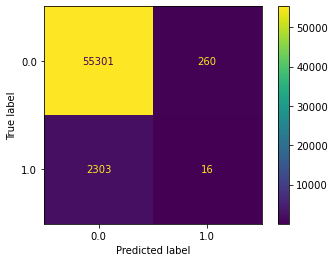

None


In [65]:
print("Random Forest:")
print(classification_report(y_test,RF_pred_r))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=RF_pred_r)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF.classes_)
vis.plot()
print(plt.show())

## Analysis
Removing the target variables did not do much in affecting the predictions of the models trained with the unbalanced dataset. Since we cannot see much difference and because of how unbalanced it is, no conclusion can be made yet. Next we will see models trained using the undersampled dataset.

# Undersample without target variables
### Undersampling technique used is Random Undersampling

In [66]:
under_sampler = RandomUnderSampler(random_state=42)
x_train_ur, y_train_ur = under_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_train_ur)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0.0: 8947, 1.0: 8947})
Testing target statistics: Counter({0.0: 55561, 1.0: 2319})


In [67]:
LR.fit(x_train_ur,y_train_ur)

LogisticRegression(max_iter=1000)

In [68]:
SVM.fit(x_train_ur,y_train_ur)

SVC()

In [69]:
KNN.fit(x_train_ur,y_train_ur)

KNeighborsClassifier()

In [70]:
DT.fit(x_train_ur,y_train_ur)

DecisionTreeClassifier()

In [71]:
RF.fit(x_train_ur,y_train_ur)

RandomForestClassifier(n_estimators=140)

In [72]:
LR_pred_ur=LR.predict(x_test)
SVM_pred_ur=SVM.predict(x_test)
KNN_pred_ur=KNN.predict(x_test)
DT_pred_ur=DT.predict(x_test)
RF_pred_ur=RF.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82     55561
         1.0       0.09      0.73      0.16      2319

    accuracy                           0.70     57880
   macro avg       0.54      0.72      0.49     57880
weighted avg       0.95      0.70      0.79     57880



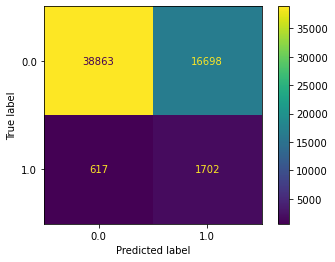

None


In [73]:
print("Logistic Regression:")
print(classification_report(y_test,LR_pred_ur))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=LR_pred_ur)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=LR.classes_)
vis.plot()
print(plt.show())

SVM:
              precision    recall  f1-score   support

         0.0       0.99      0.65      0.78     55561
         1.0       0.08      0.78      0.15      2319

    accuracy                           0.65     57880
   macro avg       0.54      0.72      0.47     57880
weighted avg       0.95      0.65      0.76     57880



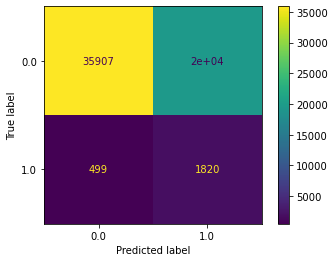

None


In [74]:
print("SVM:")
print(classification_report(y_test,SVM_pred_ur))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=SVM_pred_ur)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVM.classes_)
vis.plot()
print(plt.show())

KNN:
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.80     55561
         1.0       0.08      0.67      0.14      2319

    accuracy                           0.67     57880
   macro avg       0.53      0.67      0.47     57880
weighted avg       0.94      0.67      0.77     57880



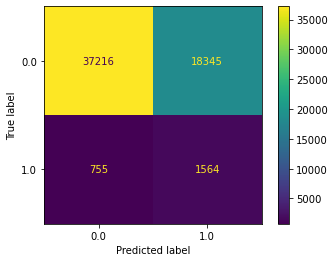

None


In [75]:
print("KNN:")
print(classification_report(y_test,KNN_pred_ur))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=KNN_pred_ur)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=KNN.classes_)
vis.plot()
print(plt.show())

Decision Tree:
              precision    recall  f1-score   support

         0.0       0.98      0.64      0.77     55561
         1.0       0.07      0.63      0.12      2319

    accuracy                           0.64     57880
   macro avg       0.52      0.63      0.45     57880
weighted avg       0.94      0.64      0.74     57880



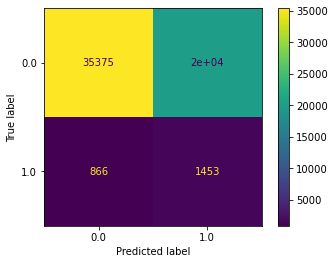

None


In [76]:
print("Decision Tree:")
print(classification_report(y_test,DT_pred_ur))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=DT_pred_ur)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=DT.classes_)
vis.plot()
print(plt.show())

Random Forest:
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.80     55561
         1.0       0.09      0.74      0.16      2319

    accuracy                           0.68     57880
   macro avg       0.54      0.71      0.48     57880
weighted avg       0.95      0.68      0.77     57880



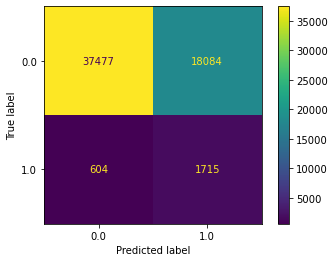

None


In [77]:
print("Random Forest:")
print(classification_report(y_test,RF_pred_ur))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=RF_pred_ur)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF.classes_)
vis.plot()
print(plt.show())

## Analysis
Undersampling still decreased the overall accuracy same as in the first round where we included the target variables. The highest True positive rate this time is 78.5% and the highest True negative rate is 70.0% which is not much different from the models trained using the target variables with True positive rates having almost no change at all while True negative rate decreased from 74.5% to the current 70.0%. Our best model this time is the Logistic regession with an accuracy of 70%, True positive rate of 73.4% and a True negative rate of 70%. This shows that the target variables does not affect the results of the predictionns much thus the hypothesis being independent from the other hypothesis'. Next we will see the performance of the models trained without our target variables and using Oversampling and Undersampling techniques.

# Undersample 40-60 without target variables
### Undersampling technique used is Random Undersampling

In [7]:
# over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('u', under)]
pipeline = Pipeline(steps=steps)
x_train_rou, y_train_rou = pipeline.fit_resample(x_train, y_train)
print(f"Training target statistics(original): {Counter(y_train)}")
print(f"Training target statistics: {Counter(y_train_rou)}")

Training target statistics(original): Counter({0.0: 222572, 1.0: 8947})
Training target statistics: Counter({0.0: 12781, 1.0: 8947})


In [79]:
LR.fit(x_train_rou,y_train_rou)

LogisticRegression(max_iter=1000)

In [80]:
SVM.fit(x_train_rou,y_train_rou)

SVC()

In [81]:
KNN.fit(x_train_rou,y_train_rou)

KNeighborsClassifier()

In [82]:
DT.fit(x_train_rou,y_train_rou)

DecisionTreeClassifier()

In [83]:
RF.fit(x_train_rou,y_train_rou)

RandomForestClassifier(n_estimators=140)

In [84]:
LR_pred_rou=LR.predict(x_test)
SVM_pred_rou=SVM.predict(x_test)
KNN_pred_rou=KNN.predict(x_test)
DT_pred_rou=DT.predict(x_test)
RF_pred_rou=RF.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89     55561
         1.0       0.11      0.58      0.19      2319

    accuracy                           0.80     57880
   macro avg       0.55      0.69      0.54     57880
weighted avg       0.94      0.80      0.86     57880



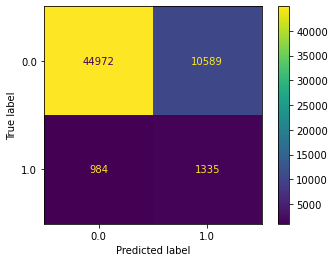

None


In [85]:
print("Logistic Regression:")
print(classification_report(y_test,LR_pred_rou))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=LR_pred_rou)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=LR.classes_)
vis.plot()
print(plt.show())

SVM:
              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89     55561
         1.0       0.11      0.53      0.19      2319

    accuracy                           0.81     57880
   macro avg       0.54      0.68      0.54     57880
weighted avg       0.94      0.81      0.87     57880



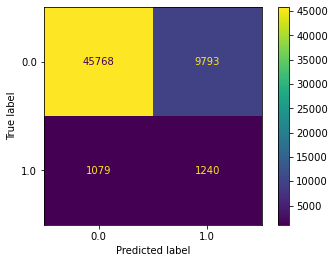

None


In [86]:
print("SVM:")
print(classification_report(y_test,SVM_pred_rou))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=SVM_pred_rou)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVM.classes_)
vis.plot()
print(plt.show())

KNN:
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85     55561
         1.0       0.08      0.55      0.15      2319

    accuracy                           0.74     57880
   macro avg       0.53      0.65      0.50     57880
weighted avg       0.94      0.74      0.82     57880



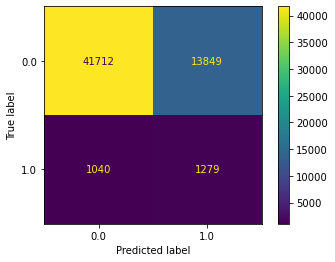

None


In [87]:
print("KNN:")
print(classification_report(y_test,KNN_pred_rou))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=KNN_pred_rou)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=KNN.classes_)
vis.plot()
print(plt.show())

Decision Tree:
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81     55561
         1.0       0.07      0.57      0.13      2319

    accuracy                           0.68     57880
   macro avg       0.52      0.63      0.47     57880
weighted avg       0.94      0.68      0.78     57880



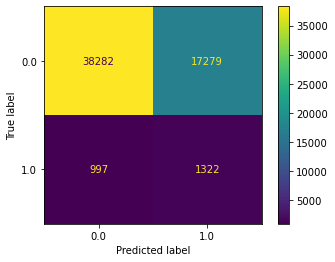

None


In [88]:
print("Decision Tree:")
print(classification_report(y_test,DT_pred_rou))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=DT_pred_rou)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=DT.classes_)
vis.plot()
print(plt.show())

Random Forest:
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85     55561
         1.0       0.10      0.64      0.17      2319

    accuracy                           0.74     57880
   macro avg       0.54      0.69      0.51     57880
weighted avg       0.94      0.74      0.82     57880



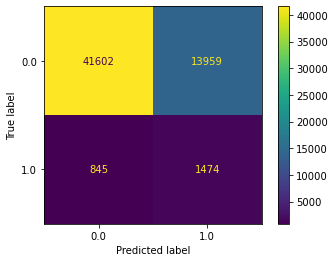

None


In [89]:
print("Random Forest:")
print(classification_report(y_test,RF_pred_rou))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=RF_pred_rou)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF.classes_)
vis.plot()
print(plt.show())

## Analysis
Our best models are Random Forest and logistic regression. Logistic regression has a higher accuracy of 80%, True positive rate of 57.6% and True negative rate of 81.0%. Random Forest has an accuracy of 74% with a True positve rate of 63.6% and True negative rate of 74.8%. The old model trained with the target variables had an accuracy of 76%, True positive rate of 66% and a True negative rate of 76.7% as our best model. From these results we can see that although accuracy decreased, removing the target variables only affected the accuracy a little bit and not to such a large extent. Thus we can conclude that the hypothesis is independent and not dependent on the other target variables.

# Feature Selected Dataset

In [8]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train_rou, y_train_rou)


SelectFromModel(estimator=RandomForestClassifier())

In [9]:
sel.get_support()

array([ True,  True, False,  True, False, False, False, False,  True,
       False, False,  True, False, False])

In [10]:
df.columns

Index(['Stroke_code', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'Smoking_code', 'AlcoholDrinking_code', 'DiffWalking_code', 'Sex_code',
       'AgeCategory_code', 'Race_code', 'PhysicalActivity_code',
       'GenHealth_code', 'Asthma_code', 'KidneyDisease_code'],
      dtype='object')

In [11]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x_train_rou, y_train_rou)
columns = list(df.loc[:,df.columns != "Stroke_code"].columns)
importance = model.feature_importances_
print(np.concatenate((np.reshape(columns,(len(columns),1)), model.feature_importances_.reshape(len(importance),1)),1))

[['BMI' '0.2609770851665662']
 ['PhysicalHealth' '0.08624142204538877']
 ['MentalHealth' '0.07503087250485738']
 ['SleepTime' '0.09653224037644562']
 ['Smoking_code' '0.02119288075086017']
 ['AlcoholDrinking_code' '0.0088900537124301']
 ['DiffWalking_code' '0.07232669556382584']
 ['Sex_code' '0.02678664476371635']
 ['AgeCategory_code' '0.1742693546898089']
 ['Race_code' '0.04689908469013443']
 ['PhysicalActivity_code' '0.021756239968471796']
 ['GenHealth_code' '0.07105199575029328']
 ['Asthma_code' '0.019897384609695805']
 ['KidneyDisease_code' '0.01814804540750539']]


In [5]:
df_new = df.copy()
df_new = df_new.drop(columns = ['DiffWalking_code','Race_code','MentalHealth',
'KidneyDisease_code','Asthma_code','PhysicalActivity_code','Sex_code','AlcoholDrinking_code','Smoking_code'])

In [25]:
df_new.columns

Index(['Stroke_code', 'BMI', 'PhysicalHealth', 'SleepTime', 'AgeCategory_code',
       'GenHealth_code'],
      dtype='object')

In [6]:
x = df_new.iloc[:,1:].values
y = df_new.iloc[:,0].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
# over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('u', under)]
pipeline = Pipeline(steps=steps)
x_train_fs, y_train_fs = pipeline.fit_resample(x_train, y_train)
print(f"Training target statistics(original): {Counter(y_train)}")
print(f"Training target statistics: {Counter(y_train_fs)}")

Training target statistics(original): Counter({0.0: 222572, 1.0: 8947})
Training target statistics: Counter({0.0: 12781, 1.0: 8947})


In [46]:
LR.fit(x_train_fs,y_train_fs)

LogisticRegression(max_iter=1000)

In [8]:
SVM.fit(x_train_fs,y_train_fs)

SVC()

In [48]:
KNN.fit(x_train_fs,y_train_fs)

KNeighborsClassifier()

In [49]:
DT.fit(x_train_fs,y_train_fs)

DecisionTreeClassifier()

In [50]:
RF.fit(x_train_fs,y_train_fs)

RandomForestClassifier(n_estimators=140)

In [51]:
LR_pred_fs=LR.predict(x_test)
SVM_pred_fs=SVM.predict(x_test)
KNN_pred_fs=KNN.predict(x_test)
DT_pred_fs=DT.predict(x_test)
RF_pred_fs=RF.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86     55561
         1.0       0.10      0.58      0.17      2319

    accuracy                           0.77     57880
   macro avg       0.54      0.68      0.52     57880
weighted avg       0.94      0.77      0.84     57880



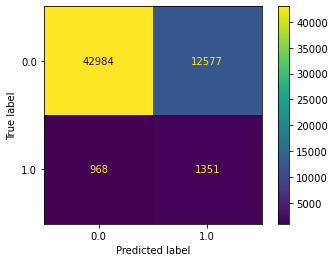

None


In [52]:
print("Logistic Regression:")
print(classification_report(y_test,LR_pred_fs))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=LR_pred_fs)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=LR.classes_)
vis.plot()
print(plt.show())

SVM:
              precision    recall  f1-score   support

         0.0       0.98      0.76      0.86     55561
         1.0       0.10      0.61      0.17      2319

    accuracy                           0.76     57880
   macro avg       0.54      0.69      0.51     57880
weighted avg       0.94      0.76      0.83     57880



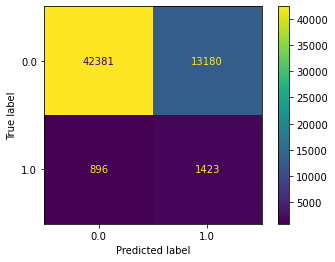

None


In [53]:
print("SVM:")
print(classification_report(y_test,SVM_pred_fs))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=SVM_pred_fs)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVM.classes_)
vis.plot()
print(plt.show())

KNN:
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84     55561
         1.0       0.08      0.57      0.14      2319

    accuracy                           0.73     57880
   macro avg       0.53      0.65      0.49     57880
weighted avg       0.94      0.73      0.81     57880



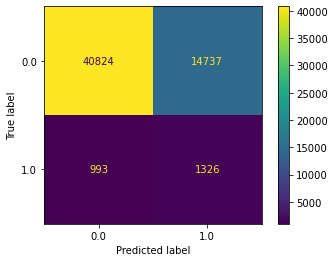

None


In [54]:
print("KNN:")
print(classification_report(y_test,KNN_pred_fs))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=KNN_pred_fs)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=KNN.classes_)
vis.plot()
print(plt.show())

Decision Tree:
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81     55561
         1.0       0.07      0.53      0.12      2319

    accuracy                           0.69     57880
   macro avg       0.52      0.61      0.47     57880
weighted avg       0.94      0.69      0.78     57880



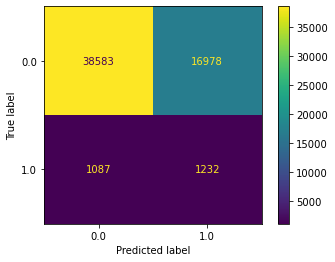

None


In [55]:
print("Decision Tree:")
print(classification_report(y_test,DT_pred_fs))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=DT_pred_fs)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=DT.classes_)
vis.plot()
print(plt.show())

Random Forest:
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     55561
         1.0       0.08      0.58      0.13      2319

    accuracy                           0.70     57880
   macro avg       0.53      0.64      0.48     57880
weighted avg       0.94      0.70      0.79     57880



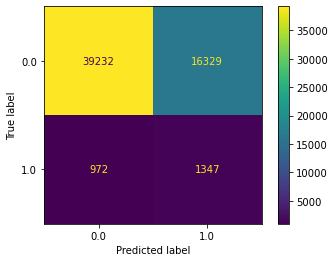

None


In [56]:
print("Random Forest:")
print(classification_report(y_test,RF_pred_fs))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=RF_pred_fs)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF.classes_)
vis.plot()
print(plt.show())

## Analysis
After feature extraction was done, we can see now that our best model this time is SVM which is not one of the best models in our previous testing. The SVM model trained with the fearure selected dataset has an accuracy of 76%, True Positive rate of 61.4% and True negative rate of 76.3%. Although the True positive rate dropped from 63.6% in our non-feature selected best model to 61.4%, the value change was not too significant from True positive value of 1474 to 1423. However we see a 2% increase in True negative rate which matches our goal of keeping our True positive rate and increasing our true negative rate. Next we will see if SleepTime affects stroke.

# Fine tuning best model parameters

In [9]:
SVM_pred_fs=SVM.predict(x_test)

SVM:
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86     55561
         1.0       0.10      0.60      0.17      2319

    accuracy                           0.76     57880
   macro avg       0.54      0.68      0.51     57880
weighted avg       0.94      0.76      0.83     57880



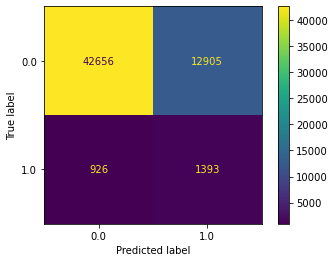

None


In [10]:
print("SVM:")
print(classification_report(y_test,SVM_pred_fs))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=SVM_pred_fs)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVM.classes_)
vis.plot()
print(plt.show())

In [14]:
kernels = ['origianl', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC()
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [18]:
svm = SVC(kernel='rbf', gamma="auto",probability=True)

In [19]:
svm.fit(x_train_fs, y_train_fs)

SVC(gamma='auto', probability=True)

In [20]:
y_pred = svm.predict(x_test)

              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85     55561
         1.0       0.10      0.63      0.17      2319

    accuracy                           0.75     57880
   macro avg       0.54      0.69      0.51     57880
weighted avg       0.94      0.75      0.82     57880



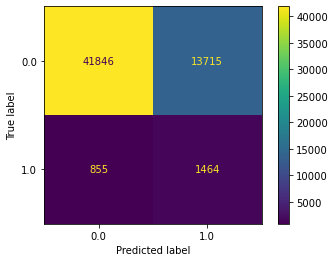

None


In [21]:
print(classification_report(y_test,y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm.classes_)
vis.plot()
print(plt.show())

In [13]:
import lime
from lime import lime_tabular
columns = list(df_new.loc[:,df_new.columns != "Stroke_code"].columns)
explainer = lime_tabular.LimeTabularExplainer(
    training_data=x_train_fs,
    feature_names=columns,
    class_names=[0, 1],
    mode='classification'
)

In [25]:
y_test[27]

0.0

In [26]:
exp = explainer.explain_instance(
    data_row=x_test[30],
    predict_fn=svm.predict_proba
)

exp.show_in_notebook(show_table=True)

Evaluation: origianl kernel
              precision    recall  f1-score   support

         0.0       0.98      0.76      0.86     55561
         1.0       0.10      0.61      0.17      2319

    accuracy                           0.76     57880
   macro avg       0.54      0.69      0.51     57880
weighted avg       0.94      0.76      0.83     57880



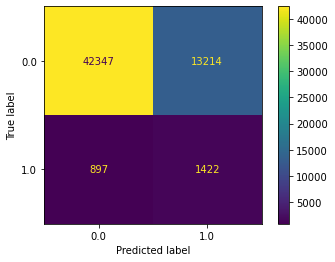

None
Evaluation: RBF kernel
              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84     55561
         1.0       0.09      0.64      0.16      2319

    accuracy                           0.74     57880
   macro avg       0.54      0.69      0.50     57880
weighted avg       0.94      0.74      0.82     57880



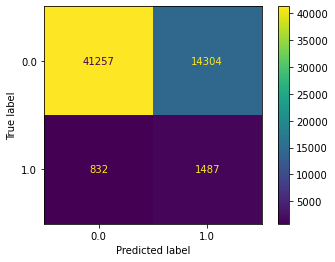

None
Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     55561
         1.0       0.00      0.00      0.00      2319

    accuracy                           0.96     57880
   macro avg       0.48      0.50      0.49     57880
weighted avg       0.92      0.96      0.94     57880



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


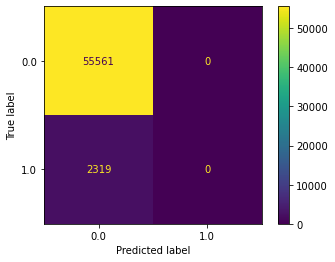

None
Evaluation: Linear kernel
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.88     55561
         1.0       0.10      0.53      0.17      2319

    accuracy                           0.80     57880
   macro avg       0.54      0.67      0.53     57880
weighted avg       0.94      0.80      0.86     57880



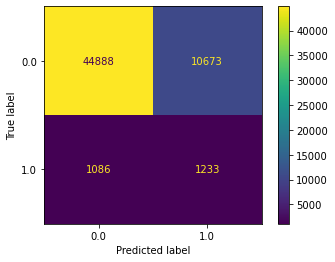

None


In [16]:
for i in range(4):
    svclassifier = getClassifier(i) 
    svclassifier.fit(x_train_fs, y_train_fs)
    y_pred = svclassifier.predict(x_test)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svclassifier.classes_)
    vis.plot()
    print(plt.show())

# Does SleepTime affect prediction?

In [57]:
df_new = df.copy()
df_new = df_new.drop(columns = ['Diabetic_code','SkinCancer_code','HeartDisease_code','SleepTime','DiffWalking_code','Race_code','MentalHealth','KidneyDisease_code','Asthma_code','PhysicalActivity_code','Sex_code','AlcoholDrinking_code','Smoking_code'])

In [62]:
df_new.columns

Index(['Stroke_code', 'BMI', 'PhysicalHealth', 'AgeCategory_code',
       'GenHealth_code'],
      dtype='object')

In [63]:
x = df_new.iloc[:,1:].values
y = df_new.iloc[:,0].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:
# over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('u', under)]
pipeline = Pipeline(steps=steps)
x_train_fs, y_train_fs = pipeline.fit_resample(x_train, y_train)
print(f"Training target statistics(original): {Counter(y_train)}")
print(f"Training target statistics: {Counter(y_train_fs)}")

Training target statistics(original): Counter({0.0: 222572, 1.0: 8947})
Training target statistics: Counter({0.0: 12781, 1.0: 8947})


In [65]:
SVM.fit(x_train_fs,y_train_fs)

SVC()

In [66]:
LR.fit(x_train_fs,y_train_fs)

LogisticRegression(max_iter=1000)

In [67]:
RF.fit(x_train_fs,y_train_fs)

RandomForestClassifier(n_estimators=140)

In [68]:
LR_pred_fs=LR.predict(x_test)
SVM_pred_fs=SVM.predict(x_test)
RF_pred_fs=RF.predict(x_test)

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87     55561
         1.0       0.10      0.56      0.17      2319

    accuracy                           0.78     57880
   macro avg       0.54      0.68      0.52     57880
weighted avg       0.94      0.78      0.84     57880



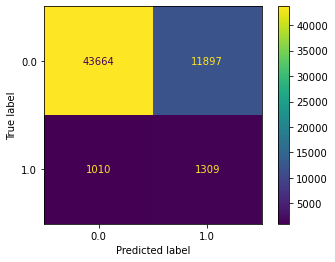

None


In [69]:
print("Logistic Regression:")
print(classification_report(y_test,LR_pred_fs))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=LR_pred_fs)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=LR.classes_)
vis.plot()
print(plt.show())

SVM:
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.88     55561
         1.0       0.10      0.53      0.17      2319

    accuracy                           0.80     57880
   macro avg       0.54      0.67      0.53     57880
weighted avg       0.94      0.80      0.86     57880



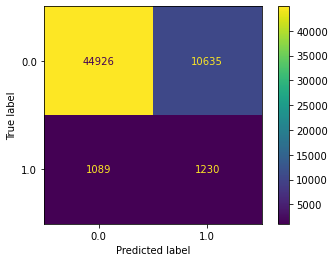

None


In [70]:
print("SVM:")
print(classification_report(y_test,SVM_pred_fs))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=SVM_pred_fs)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVM.classes_)
vis.plot()
print(plt.show())

Random Forest:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     55561
         1.0       0.07      0.56      0.13      2319

    accuracy                           0.70     57880
   macro avg       0.52      0.63      0.48     57880
weighted avg       0.94      0.70      0.79     57880



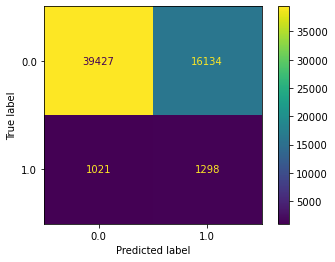

None


In [71]:
print("Random Forest:")
print(classification_report(y_test,RF_pred_fs))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=RF_pred_fs)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF.classes_)
vis.plot()
print(plt.show())

In [72]:
import scipy.stats as stats
stats.pointbiserialr(df['SleepTime'], y)

SignificanceResult(statistic=-0.004205348743534006, pvalue=0.02367875257840617)

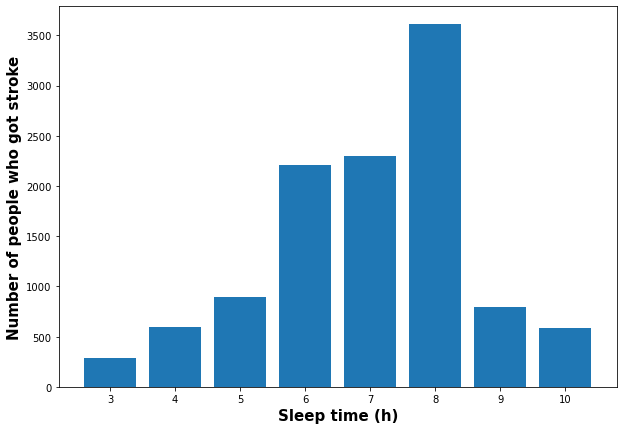

In [16]:
sleeptimes = [3,4,5,6,7,8,9,10]
count = []
for num in sleeptimes:
    c = df[(df['SleepTime']==num)&(df['Stroke_code']==1)]
    count.append(len(c))
fig = plt.figure(figsize =(10, 7))
plt.bar(sleeptimes, count)
plt.xlabel('Sleep time (h)', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of people who got stroke', fontweight ='bold', fontsize = 15)
plt.show()

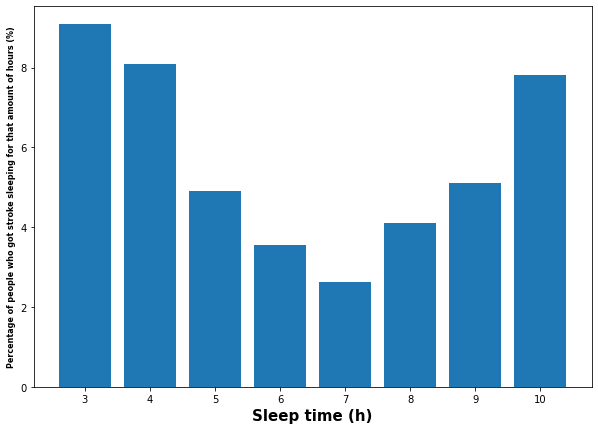

In [22]:
percentages = []
for num in sleeptimes:
    total = df[df['SleepTime']==num]
    has_stroke = df[(df['SleepTime']==num)&(df['Stroke_code']==1)]
    percentage = round(((len(has_stroke)/len(total))*100),2)
    percentages.append(percentage)
fig = plt.figure(figsize =(10, 7))
plt.bar(sleeptimes, percentages)
plt.xlabel('Sleep time (h)', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentage of people who got stroke sleeping for that amount of hours (%)', fontweight ='bold', fontsize = 8)
plt.show()

## Analysis
From our models trained without the columns SleepTime, We can see that the accuracy has indeed gone up, however the True positive rate has significantly decreased where here our highest true poisitve rate is 56.4% which is a decrease of 5% from our previous best model trained with SleepTime. Even when looking at the numbers, True positives dropped from 1423 to 1309. This tells us that SleepTime does in fact affect stroke prediction although not by much. From the chart that was plotted by number, sleeping between 6-8 hours has the highest likelihood of getting stroke, however, this might be because the number of people sleeping whithin this amount range is higher. If we look at the chart based on the percentage of people who got stroke as compared to the total number of people sleeping in a certain range of time, we can see that in fact people sleeping less have a higher chance of getting stroke with the exception of  10 hours. We can therefore conclude that the hypothesis that "There is a positive association between shorter sleep duration and the risk of experiencing a stroke." is false. The statement is true only to a certain extent as we can see that sleeping more than the body needs also increases the chance of getting stroke.